# read in combined CARIACO csv

In [33]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [117]:
pd_CARIACO = pd.read_csv("../DATA/Combined_CARIACO_data.csv")

In [118]:
pd_CARIACO['time_month_dt'] = pd.to_datetime(pd_CARIACO['time_month'])

In [119]:
pd_CARIACO = pd_CARIACO.drop(labels='Unnamed: 0', axis=1)

In [120]:
pd_CARIACO = pd_CARIACO.set_index('time_month_dt')
pd_CARIACO.index.rename('time', inplace=True)

In [121]:
pd_CARIACO.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256 entries, 1995-11-01 to 2017-01-01
Data columns (total 95 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   X10m_u_component_of_wind                                256 non-null    float64
 1   X10m_v_component_of_neutral_wind                        256 non-null    float64
 2   X10m_v_component_of_wind                                256 non-null    float64
 3   X10m_wind_speed                                         256 non-null    float64
 4   X2m_temperature                                         256 non-null    float64
 5   coefficient_of_drag_with_waves                          256 non-null    float64
 6   instantaneous_eastward_turbulent_surface_stress         256 non-null    float64
 7   instantaneous_northward_turbulent_surface_stress        256 non-null    float64
 8   mean_wave_period     

# convert to xarray dataset

In [122]:
from datetime import date

today = date.today()

In [123]:
str(today)

'2021-12-08'

In [176]:
metadata = {'creator': 'Benjamin Post', 'creation date': str(today)}
CARIACO = xr.Dataset.from_dataframe(pd_CARIACO)
CARIACO.attrs = metadata

# add Metadata programmatically
- add clear text variable names
- add units
- add data source
- add data group (biological, physical, chemical)

In [177]:
CARIACO

<xarray.Dataset>
Dimensions:                                                 (time: 256)
Coordinates:
  * time                                                    (time) datetime64[ns] ...
Data variables:
    X10m_u_component_of_wind                                (time) float64 -5...
    X10m_v_component_of_neutral_wind                        (time) float64 -2...
    X10m_v_component_of_wind                                (time) float64 -2...
    X10m_wind_speed                                         (time) float64 6....
    X2m_temperature                                         (time) float64 29...
    coefficient_of_drag_with_waves                          (time) float64 0....
    instantaneous_eastward_turbulent_surface_stress         (time) float64 -0...
    instantaneous_northward_turbulent_surface_stress        (time) float64 -0...
    mean_wave_period                                        (time) float64 5....
    medium_cloud_cover                                      (time) float64 0....
    normalized_stress_into_ocean                            (time) float64 0....
    ocean_surface_stress_equivalent_10m_neutral_wind_speed  (time) float64 4....
    sea_surface_temperature                                 (time) float64 30...
    surface_pressure                                        (time) float64 1....
    u_component_stokes_drift                                (time) float64 -0...
    v_component_stokes_drift                                (time) float64 -0...
    time_month                                              (time) object '11...
    clear_sky_direct_solar_radiation_at_surface             (time) int64 1908...
    eastward_turbulent_surface_stress                       (time) float64 -5...
    evaporation                                             (time) float64 -0...
    instantaneous_10m_wind_gust                             (time) float64 8....
    large_scale_precipitation                               (time) float64 0....
    magnitude_of_turbulent_surface_stress                   (time) float64 6....
    mean_eastward_turbulent_surface_stress                  (time) float64 -0...
    mean_evaporation_rate                                   (time) float64 -4...
    mean_magnitude_of_turbulent_surface_stress              (time) float64 0....
    mean_northward_turbulent_surface_stress                 (time) float64 -0...
    mean_total_precipitation_rate                           (time) float64 1....
    northward_turbulent_surface_stress                      (time) float64 -2...
    surface_sensible_heat_flux                              (time) int64 -668...
    total_precipitation                                     (time) float64 0....
    O2_ml_L                                                 (time) float64 4....
    O2_umol_kg                                              (time) float64 17...
    NO3_UDO                                                 (time) float64 0....
    PO4_UDO                                                 (time) float64 0....
    SiO4_UDO                                                (time) float64 2....
    NH4_USF                                                 (time) float64 na...
    NO2_USF                                                 (time) float64 na...
    NO3_NO2_USF                                             (time) float64 na...
    PO4_USF                                                 (time) float64 na...
    SiO4_USF                                                (time) float64 na...
    pH                                                      (time) float64 na...
    Alkalinity_mol_kg                                       (time) float64 0....
    Alkalinity_umol_kg                                      (time) float64 2....
    TCO2                                                    (time) float64 na...
    fCO2                                                    (time) float64 na...
    pH_corrected                                            (time) flo

In [178]:
### add units
# data.attrs['long_name']
# data.attrs['units']

CARIACO.Chlorophyll.attrs['long_name'] = 'Chlorophyll conc. top 100m [mg m^-3]'
CARIACO.Chlorophyll.attrs['unit'] = '[mg m^-3]'

In [179]:
#timetest = CARIACO.expand_dims({'year':CARIACO['time.year'],'month':CARIACO['time.month']})

In [180]:
time2darray = np.vstack((CARIACO['time.year'].values,CARIACO['time.month'].values))

In [182]:
timetest = CARIACO.assign_coords(new_dim=(('year', 'month'), time2darray))

ValueError: x must be one of None, 'time'

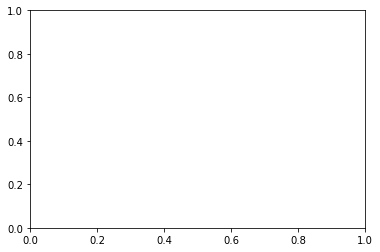

In [184]:
timetest.Chlorophyll.plot(x='year')

In [170]:
timetest.plot.pcolormesh(x='month',y='time',z='Chlorophyll')

AttributeError: '_Dataset_PlotMethods' object has no attribute 'pcolormesh'

In [169]:
timetest.Chlorophyll.plot.pcolormesh()

ValueError: DataArray must be 2d

ValueError: x must be one of None, 'time'

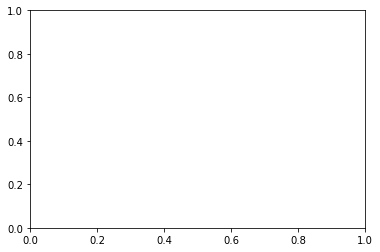

In [148]:
CARIACO.Chlorophyll.plot(x='month')

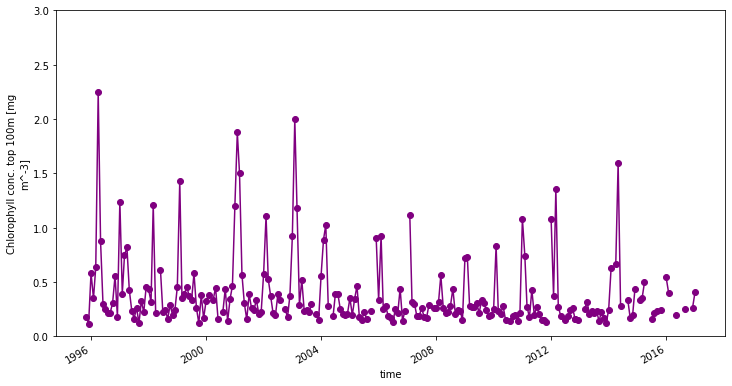

In [139]:
CARIACO.Chlorophyll.plot.line(color="purple", marker="o",
                             aspect=2, size=6, ylim=[0,3])

# export to ncdf for plotting etc.